ME200, Johannes Ruf and Luitgard Veraart

# Day 5: Random number generation in Python (cont'ed)

## The acceptance-rejection algorithm for the beta distribution

To introduce the beta distribution, we need to define the following function

$$
	\beta(a,b) = \int_0^1 x^{a-1} (1-x)^{b-1} dx, \qquad a, b > 0.
$$

This function does not have an analytic solution.

The `scipy` package provides a way to compute the function:

In [10]:
from scipy.special import beta

In [11]:
beta(2, 3)

0.08333333333333333

The beta distribution is a continuous distribution with parameters $a,b$ and with PDF

$$
	f(x) = \left \{ \begin{array}{cc}
0, & \textrm{ if } x \notin (0, 1), \\
\frac{x^{a-1} (1-x)^{b-1}}{\beta(a,b)}, & \textrm{ if } x \in (0,1)
\end{array}
\right . 
$$

Our goal is now to generate samples from the beta distribution. 

To start, let us implement the beta PDF as follows, using an if-type statement:

In [37]:
import numpy as np

In [38]:
def beta_pdf(x, a=3, b=4) :
    # the following line behaves like an if statement. It avoids a loop if x is an array.
    return np.where((x <= 0) | (x >= 1), 0., x**(a - 1) * (1 - x)**(b - 1) / beta(a,b))

We want to use uniformly distributed samples, hence we have to find $c$ such that $f(x) \leq c$ for all $x \in [0,1]$.

This seems difficult to do analytically, so let's use Python to find such $c$. (`scipy` has a good minimization routine)

In [39]:
from scipy import optimize

In [40]:
a_param, b_param = 3, 4

In [41]:
return_object_optimizer = optimize.minimize(lambda x: -beta_pdf(x, a=a_param, b=b_param), 1/2);
print(return_object_optimizer)
c = -return_object_optimizer['fun']

      fun: -2.0735999999999994
 hess_inv: array([[0.0231442]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.39999999])


In [42]:
rng = np.random.default_rng(seed=12345) 

u = rng.random()
cand = rng.random()      
while (u > beta_pdf(cand, a=a_param, b=b_param) / c):      # is U larger than f(x) / (c g(x)) ???
    u = rng.random()
    cand = rng.random()    

print(f'Sample from beta distribution: {cand}.')

Sample from beta distribution: 0.31675833970975287.


## Control structures in Python, part II, and beta distribution (cont'ed)

* We have encountered two different control structures: for and while loops:

 * The while loop is  used when we need to repeat some commands until a given condition is true.  We do not know how many times the commands need to be executed beforehand.
 * The for loop is  used when we need to repeat some commands a given number of times.

* The while loop needs some caution. For example, the next code never stops:

`while (1 > 0):
     print('hello')`

* Sometimes, we need to combine for and while loops.
* For example, if we want to generate 1000 samples from the beta distribution, then we would use an outer for loop and an inner while loop, see the next slide.

In [43]:
sample_size = 100_000
samples = []    # instead of an empty array a so called empty list, as an alternative
counter = 0

rng = np.random.default_rng(seed=12345) 

for _ in range(sample_size):
    u = rng.random()
    cand = rng.random()       # candidate sample from g PDF
    counter += 1
    
    while (u > beta_pdf(cand, a=a_param, b=b_param) / c):      
        # is U larger than f(x) / (c g(x)) ???
        
        u = rng.random()
        cand = rng.random()    
        counter += 1
    samples.append(cand)

print('We used {} iterations for {} samples.'.format(counter, sample_size))

We used 207553 iterations for 100000 samples.


Note that this is pretty close to what we would expect from our value of $c$.

Let's compare with the `numpy` random number generator:

In [44]:
samples_np = rng.beta(a=a_param, b=b_param, size=sample_size)

In [45]:
import matplotlib.pyplot as plt

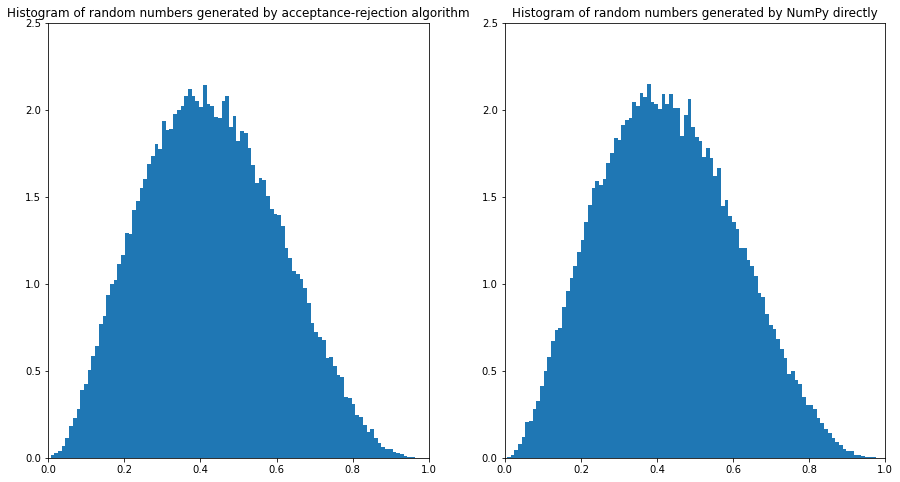

In [46]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].hist(samples, bins=100, density=True);
axs[0].set_title('Histogram of random numbers generated by acceptance-rejection algorithm')
axs[1].hist(samples_np, bins=100, density=True);
axs[1].set_title('Histogram of random numbers generated by NumPy directly');
for ax in axs:
    ax.set_ylim([0, 2.5]);
    ax.set_xlim([0, 1]);

We observe, this looks again pretty close.